In [1]:
# importing pandas
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

In [2]:
# creating the path
police_file = Path("Resources/Police_Incidents_2023.csv")

In [3]:
df = pd.read_csv(police_file)
df.head()

,X,Y,publicaddress,caseNumber,precinct,reportedDate,reportedTime,beginDate,reportedDateTime,beginTime,...,enteredDate,centergbsid,centerLong,centerLat,centerX,centerY,neighborhood,lastchanged,LastUpdateDateETL,OBJECTID
0,-93.285301,44.982860,0004XX BORDER AVE N,MP202327184,1,2023/02/03 00:00:00+00,1824,2023/02/01 00:00:00+00,2023/02/03 18:24:00+00,600,...,2023/02/09 00:00:00+00,NaN,-93.28530,44.98286,-10384472.21,5618823.534,North Loop,2023/03/01 00:00:00+00,2023/03/02 07:03:27+00,1
1,-93.313265,45.038208,0045XX OSSEO RD,MP202335824,4,2023/02/13 00:00:00+00,1459,2023/02/13 00:00:00+00,2023/02/13 14:59:00+00,1459,...,2023/02/14 00:00:00+00,NaN,-93.31327,45.03821,-10387585.14,5627538.576,Victory,2023/08/16 00:00:00+00,2023/08/17 07:03:24+00,2
2,-93.279639,44.955534,BLAISDELL AVE / 26TH ST W,MP202337360,5,2023/02/15 00:00:00+00,1257,2023/02/13 00:00:00+00,2023/02/15 12:57:00+00,1800,...,2023/03/01 00:00:00+00,NaN,-93.27964,44.95553,-10383841.88,5614523.862,Whittier,2023/03/01 00:00:00+00,2023/03/02 07:03:27+00,3
3,-93.228834,45.003639,0014XX NEW BRIGHTON BLVD,MP202344523,2,2023/02/28 00:00:00+00,1209,2023/02/23 00:00:00+00,2023/02/28 12:09:00+00,2137,...,2023/02/24 00:00:00+00,NaN,-93.22883,45.00364,-10378186.34,5622094.403,Northeast Park,2023/03/07 00:00:00+00,2023/03/08 07:03:03+00,4
4,-93.311413,44.998792,0024XX GOLDEN VALLEY RD,MP202345920,4,2023/02/27 00:00:00+00,1435,2023/02/24 00:00:00+00,2023/02/27 14:35:00+00,1000,...,2023/03/01 00:00:00+00,NaN,-93.31141,44.99879,-10387378.96,5621331.328,Willard - Hay,2023/03/01 00:00:00+00,2023/03/02 07:03:27+00,5


In [6]:
df.columns

Index(['X', 'Y', 'publicaddress', 'caseNumber', 'precinct', 'reportedDate',
       'reportedTime', 'beginDate', 'reportedDateTime', 'beginTime', 'offense',
       'description', 'UCRCode', 'enteredDate', 'centergbsid', 'centerLong',
       'centerLat', 'centerX', 'centerY', 'neighborhood', 'lastchanged',
       'LastUpdateDateETL', 'OBJECTID'],
      dtype='object')

In [7]:
df['description'].unique()

array(['CSC - RAPE', 'ROBBERY INCLUDING AUTO THEFT', 'AUTOMOBILE THEFT',
       'OTHER THEFT', 'BURGLARY OF DWELLING', 'THEFT FROM MOTR VEHC',
       'THEFT-MOTR VEH PARTS', 'ARSON', 'BURGLARY OF BUSINESS',
       'SHOPLIFTING', '3RD DEG DOMES ASLT', 'ROBBERY PER AGG',
       'ASSLT W/DNGRS WEAPON', 'DOMESTIC ASSAULT/STRANGULATION',
       'ROBBERY OF PERSON', 'ASLT4-LESS THAN SUBST HARM',
       'THEFT FROM BUILDING', 'THEFT BY SWINDLE',
       'THEFT FROM PERSON SNATCH/GRAB', '2ND DEG DOMES ASLT',
       'BIKE THEFT', 'ASLT-SGNFCNT BDLY HM', 'ROBBERY OF BUSINESS',
       'ADULTERATION - HARM/ILLNESS', 'CSC - PENETRATE WITH OBJECT',
       'MURDER (GENERAL)', 'CSC - SODOMY',
       'FAIL TO PAY - TAXI/HOTEL/REST', 'ONLINE THEFT',
       'TRESPASSED - BURG BUISINESS', 'ADULTERATION - NO HARM',
       'OBS - PETTY THEFT', 'OTHER VEHICLE THEFT', 'THEFT/COINOP DEVICE',
       'ASLT-GREAT BODILY HM', 'HACKING - THEFT OF SERVICE',
       'ASLT4-SUBST HARM OR WEAPON', 'ROOFIE / DRUGS TO COMM

In [8]:
new_df = df[['publicaddress', 'caseNumber', 'precinct', 'reportedDate', 'reportedDateTime',
             'offense', 'description', 'centerLong', 'centerLat', 'centerX', 'centerY', 'neighborhood',]]
new_df.head()

,publicaddress,caseNumber,precinct,reportedDate,reportedDateTime,offense,description,centerLong,centerLat,centerX,centerY,neighborhood
0,0004XX BORDER AVE N,MP202327184,1,2023/02/03 00:00:00+00,2023/02/03 18:24:00+00,CSCR,CSC - RAPE,-93.28530,44.98286,-10384472.21,5618823.534,North Loop
1,0045XX OSSEO RD,MP202335824,4,2023/02/13 00:00:00+00,2023/02/13 14:59:00+00,CARJCK,ROBBERY INCLUDING AUTO THEFT,-93.31327,45.03821,-10387585.14,5627538.576,Victory
2,BLAISDELL AVE / 26TH ST W,MP202337360,5,2023/02/15 00:00:00+00,2023/02/15 12:57:00+00,AUTOTH,AUTOMOBILE THEFT,-93.27964,44.95553,-10383841.88,5614523.862,Whittier
3,0014XX NEW BRIGHTON BLVD,MP202344523,2,2023/02/28 00:00:00+00,2023/02/28 12:09:00+00,THEFT,OTHER THEFT,-93.22883,45.00364,-10378186.34,5622094.403,Northeast Park
4,0024XX GOLDEN VALLEY RD,MP202345920,4,2023/02/27 00:00:00+00,2023/02/27 14:35:00+00,BURGD,BURGLARY OF DWELLING,-93.31141,44.99879,-10387378.96,5621331.328,Willard - Hay


In [9]:
new_df.count()

publicaddress       27006
caseNumber          27006
precinct            27006
reportedDate        27006
reportedDateTime    27006
offense             27006
description         27006
centerLong          27006
centerLat           27006
centerX             27006
centerY             27006
neighborhood        26986
dtype: int64

In [10]:
new_df['offense'].unique()

array(['CSCR', 'CARJCK', 'AUTOTH', 'THEFT', 'BURGD', 'TFMV', 'TMVP',
       'ARSON', 'BURGB', 'SHOPLF', 'DASLT3', 'ROBPAG', 'ASLT2', 'DASTR',
       'ROBPER', 'ASLT4', 'TBLDG', 'THFTSW', 'TFPER', 'DASLT2', 'BIKETF',
       'ASLT3', 'ROBBIZ', 'ADLTTN', 'MURDR', 'WLKOFF', 'ONLTHT', 'PETIT',
       'MVTHFT', 'COINOP', 'ASLT1', 'COMPUT', 'SCRAP', 'DASLT1', 'POCKET',
       'DISARM', 'NOPAY', 'JHOMIC', 'ABSVAR'], dtype=object)

In [11]:
autoth_df = new_df.loc[new_df["offense"] == "AUTOTH"]
autoth_df = autoth_df.reset_index(drop= False, names= 'id')
autoth_df.head()

,id,publicaddress,caseNumber,precinct,reportedDate,reportedDateTime,offense,description,centerLong,centerLat,centerX,centerY,neighborhood
0,2,BLAISDELL AVE / 26TH ST W,MP202337360,5,2023/02/15 00:00:00+00,2023/02/15 12:57:00+00,AUTOTH,AUTOMOBILE THEFT,-93.27964,44.95553,-10383841.88,5614523.862,Whittier
1,5,0026XX GIRARD AVE N,MP202346685,4,2023/02/26 00:00:00+00,2023/02/26 15:23:00+00,AUTOTH,AUTOMOBILE THEFT,-93.29683,45.00686,-10385756.02,5622602.050,Jordan
2,12,0020XX CENTRAL AVE NE,MP202347923,2,2023/02/27 00:00:00+00,2023/02/27 21:43:00+00,AUTOTH,AUTOMOBILE THEFT,-93.24737,45.00939,-10380249.37,5622999.848,Windom Park
3,14,0030XX 29TH AVE S,MP202348059,3,2023/02/28 00:00:00+00,2023/02/28 03:00:00+00,AUTOTH,AUTOMOBILE THEFT,-93.23000,44.94761,-10378316.53,5613277.544,Longfellow
4,16,0057XX BLAISDELL AVE,MP202348108,5,2023/02/28 00:00:00+00,2023/02/28 09:07:00+00,AUTOTH,AUTOMOBILE THEFT,-93.27937,44.89877,-10383812.49,5605599.538,Windom


In [12]:
autoth_df.count()

id                  7995
publicaddress       7995
caseNumber          7995
precinct            7995
reportedDate        7995
reportedDateTime    7995
offense             7995
description         7995
centerLong          7995
centerLat           7995
centerX             7995
centerY             7995
neighborhood        7994
dtype: int64

In [13]:
autoth_df.columns

Index(['id', 'publicaddress', 'caseNumber', 'precinct', 'reportedDate',
       'reportedDateTime', 'offense', 'description', 'centerLong', 'centerLat',
       'centerX', 'centerY', 'neighborhood'],
      dtype='object')

In [14]:
autoth_df.to_csv('autoth_dataframe.csv', index=False)

In [35]:
countprecinct5 = autoth_df[autoth_df["precinct"] == "5"]
maxprecienct5 = countprecinct5["neighborhood"].value_counts()
maxprecienct5count = maxprecienct5.max()
ind_countprecinct5 = countprecinct5["precinct"].count()
print(f"count of precinct 5 is {ind_countprecinct5}")
print(f"with the neighborhood breakdown of {maxprecienct5}")

countprecinct4 = autoth_df[autoth_df["precinct"] == "4"]
maxprecienct4 = countprecinct4["neighborhood"].value_counts()
maxprecienct4count = maxprecienct4.max()
ind_countprecinct4 = countprecinct4["precinct"].count()
print(f"count of precinct 4 is {ind_countprecinct4}")
print(f"with the neighborhood breakdown of {maxprecienct4}")

countprecinct3 = autoth_df[autoth_df["precinct"] == "3"]
maxprecienct3 = countprecinct3["neighborhood"].value_counts()
maxprecienct3count = maxprecienct3.max()
ind_countprecinct3 = countprecinct3["precinct"].count()
print(f"count of precinct 3 is {ind_countprecinct3}")
print(f"with the neighborhood breakdown of {maxprecienct3}")


countprecinct2 = autoth_df[autoth_df["precinct"] == "2"]
maxprecienct2 = countprecinct2["neighborhood"].value_counts()
maxprecienct2count = maxprecienct2.max()
ind_countprecinct2 = countprecinct2["precinct"].count()
print(f"count of precinct 2 is {ind_countprecinct2}")
print(f"with the neighborhood breakdown of {maxprecienct2}")

countprecinct1 = autoth_df[autoth_df["precinct"] == "1"]
maxprecienct1 = countprecinct1["neighborhood"].value_counts()
maxprecienct1count = maxprecienct1.max()
ind_countprecinct1 = countprecinct1["precinct"].count()

print(f"count of precinct 1 is {ind_countprecinct1}")
print(f"with the neighborhood breakdown of {maxprecienct1}")

ydf = [ind_countprecinct1,ind_countprecinct2,ind_countprecinct3,ind_countprecinct4,ind_countprecinct5]



count of precinct 5 is 2200
with the neighborhood breakdown of neighborhood
Whittier                            581
Lowry Hill East                     304
Lyndale                             265
South Uptown                        143
King Field                          134
Steven's Square - Loring Heights    127
East Isles                          112
Lowry Hill                           84
Windom                               73
East Harriet                         58
Linden Hills                         51
East Bde Maka Ska                    50
Tangletown                           45
West Maka Ska                        38
Cedar - Isles - Dean                 29
Lynnhurst                            27
Kenwood                              25
Fulton                               24
Armatage                             17
Kenny                                12
Standish                              1
Name: count, dtype: int64
count of precinct 4 is 1358
with the neighborhood breakdow

C:\Users\Mikel\AppData\Local\Temp\ipykernel_18688\3090016699.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


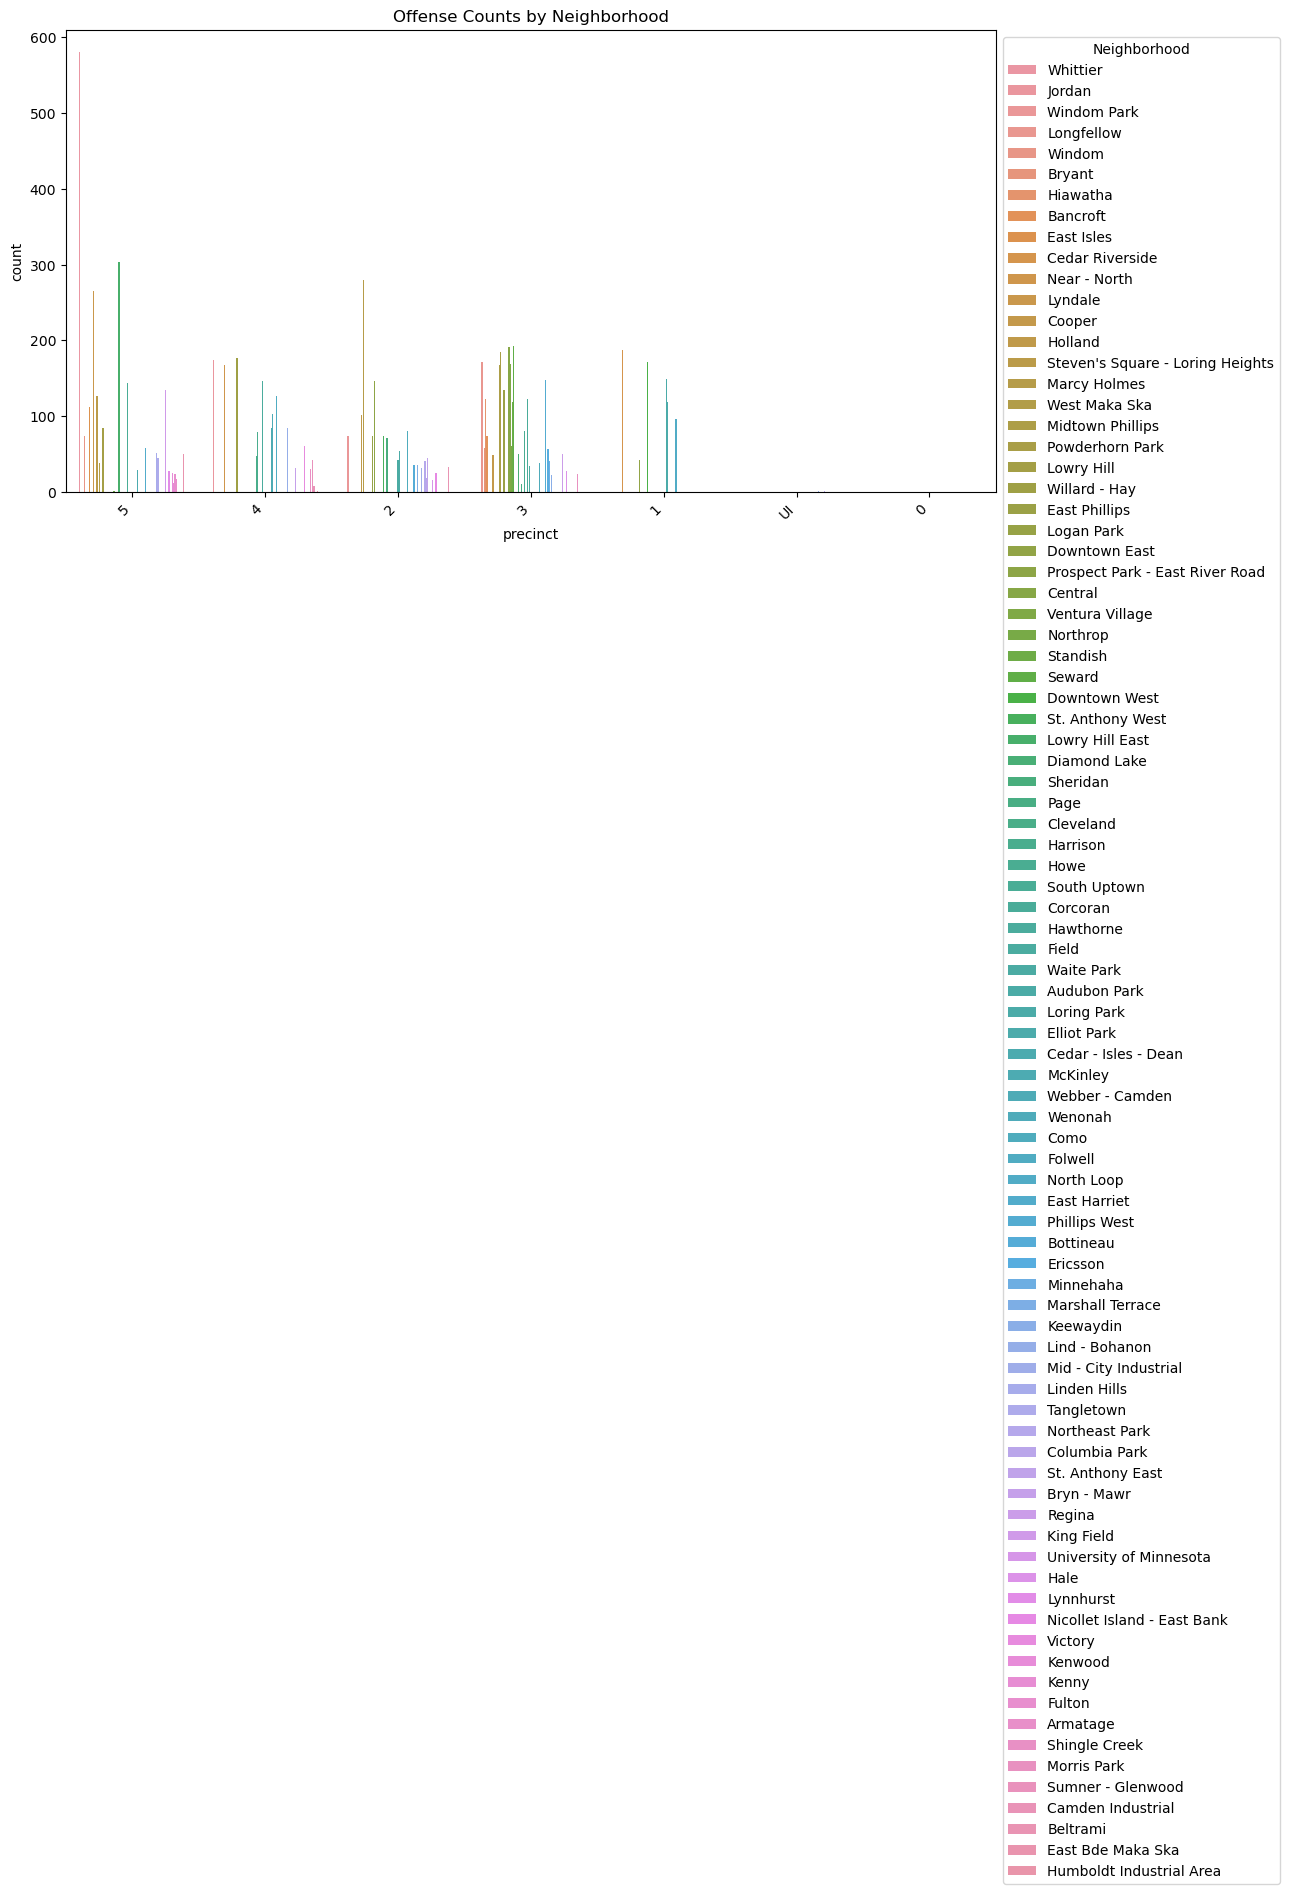

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='precinct', hue='neighborhood', data=autoth_df)
plt.title('Offense Counts by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Neighborhood', bbox_to_anchor=(1, 1))
plt.tight_layout()

plt.show()

In [17]:
print(autoth_df.dtypes)

id                    int64
publicaddress        object
caseNumber           object
precinct             object
reportedDate         object
reportedDateTime     object
offense              object
description          object
centerLong          float64
centerLat           float64
centerX             float64
centerY             float64
neighborhood         object
dtype: object


In [18]:
autoth_df["reportedDate"] = pd.to_datetime(autoth_df["reportedDate"])
#autoth_df["reportedDate"] = autoth_df["reportedDate"].dt.date

Dateprecinct1 = autoth_df[autoth_df["precinct"] == "1"]
Dateprecinct1 = Dateprecinct1["reportedDate"]
Dateprecinct1 = pd.DataFrame(Dateprecinct1)

Dateprecinct2 = autoth_df[autoth_df["precinct"] == "2"]
Dateprecinct2 = Dateprecinct2["reportedDate"]
Dateprecinct2 = pd.DataFrame(Dateprecinct2)

Dateprecinct3 = autoth_df[autoth_df["precinct"] == "3"]
Dateprecinct3 = Dateprecinct3["reportedDate"]
Dateprecinct3 = pd.DataFrame(Dateprecinct3)

Dateprecinct4 = autoth_df[autoth_df["precinct"] == "4"]
Dateprecinct4 = Dateprecinct4["reportedDate"]
Dateprecinct4 = pd.DataFrame(Dateprecinct4)

Dateprecinct5 = autoth_df[autoth_df["precinct"] == "5"]
Dateprecinct5 = Dateprecinct5["reportedDate"]
Dateprecinct5 = pd.DataFrame(Dateprecinct5)


#df = [Dateprecinct1,Dateprecinct2,Dateprecinct3,Dateprecinct4,Dateprecinct5]


#Dateprecinct1
print(f"{Dateprecinct1}")
print(f"{Dateprecinct2}")
print(f"{Dateprecinct3}")
print(f"{Dateprecinct4}")
print(f"{Dateprecinct5}")



                  reportedDate
12   2023-02-28 00:00:00+00:00
14   2023-02-28 00:00:00+00:00
31   2023-03-01 00:00:00+00:00
46   2023-09-17 00:00:00+00:00
50   2023-09-17 00:00:00+00:00
...                        ...
7897 2023-01-16 00:00:00+00:00
7908 2023-01-16 00:00:00+00:00
7912 2023-01-16 00:00:00+00:00
7937 2024-01-05 00:00:00+00:00
7946 2024-01-11 00:00:00+00:00

[765 rows x 1 columns]
                  reportedDate
2    2023-02-27 00:00:00+00:00
9    2023-02-28 00:00:00+00:00
17   2023-02-28 00:00:00+00:00
19   2023-02-28 00:00:00+00:00
20   2023-02-28 00:00:00+00:00
...                        ...
7969 2023-10-23 00:00:00+00:00
7972 2023-12-27 00:00:00+00:00
7976 2023-12-27 00:00:00+00:00
7977 2023-12-27 00:00:00+00:00
7986 2023-12-27 00:00:00+00:00

[1275 rows x 1 columns]
                  reportedDate
3    2023-02-28 00:00:00+00:00
5    2023-02-28 00:00:00+00:00
6    2023-02-28 00:00:00+00:00
7    2023-02-28 00:00:00+00:00
16   2023-02-28 00:00:00+00:00
...                  

In [206]:
df1 = ((Dateprecinct1["reportedDate"])
       .value_counts()
       .rename_axis('date')
       .reset_index(name='count')
      .sort_values("date"))
print (df)

           date  count
0    2023-04-04     10
1    2023-07-30      9
2    2023-02-06      7
3    2023-02-14      7
4    2023-07-10      7
..          ...    ...
306  2023-06-30      1
307  2023-03-14      1
308  2023-11-26      1
309  2023-09-20      1
310  2023-04-27      1

[311 rows x 2 columns]


In [33]:
df1 = Dateprecinct1.resample("W",on="reportedDate").size()
df2 = Dateprecinct2.resample("W",on="reportedDate").size()
df3 = Dateprecinct3.resample("W",on="reportedDate").size()
df4 = Dateprecinct4.resample("W",on="reportedDate").size()
df5 = Dateprecinct5.resample("W",on="reportedDate").size()

df_scatter = pd.DataFrame([df1,
df2,
df3,
df4,
df5]).transpose()
df_scatter.columns = ["precinct 1","precinct 2","precinct 3","precinct 4","precinct 5"]

In [34]:
#https://stackoverflow.com/questions/59406167/plotly-how-to-filter-a-pandas-dataframe-using-a-dropdown-menu
NPERIODS = 365

# # plotly
fig = go.Figure()

# set up ONE trace
fig.add_trace(go.Scatter(x=df_scatter.index,
                         y=df_scatter[df_scatter.columns[0]],
                         visible=True)
             )

updatemenu = []
buttons = []

# button with one option for each dataframe
for col in df_scatter.columns:
    buttons.append(dict(method='restyle',
                        label=col,
                        visible=True,
                        args=[{'y':[df_scatter[col]],
                               'x':[df_scatter.index],
                               'type':'scatter'}, [0]],
                        )
                  )

# some adjustments to the updatemenus
updatemenu = []
your_menu = dict()
updatemenu.append(your_menu)

updatemenu[0]['buttons'] = buttons
updatemenu[0]['direction'] = 'down'
updatemenu[0]['showactive'] = True

# add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=updatemenu)
fig.show()

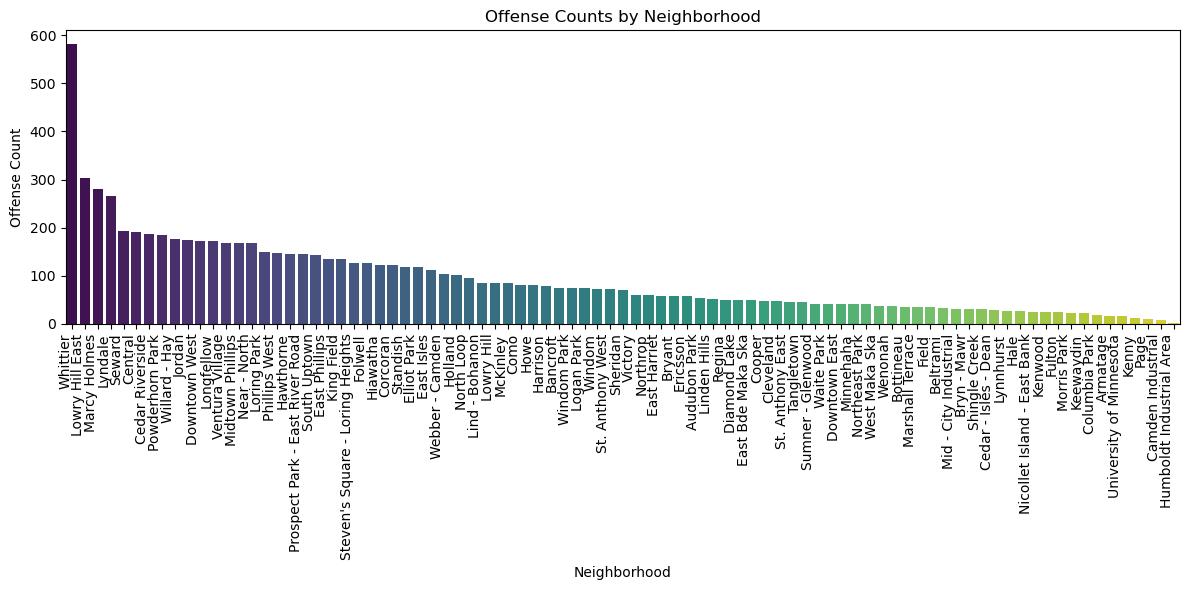

In [101]:
plt.figure(figsize=(12, 6))
sns.countplot(x='neighborhood', data=autoth_df, order=autoth_df['neighborhood'].value_counts().index, palette='viridis')

plt.title('Offense Counts by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Offense Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show(1)

In [16]:
import sqlite3

conn = sqlite3.connect("autotheft.db")
autoth_df.to_sql('autotheft_tb', conn, index=False, if_exists='replace', dtype={'id': 'INTEGER PRIMARY KEY'})

7995